In [8]:
import pandas as pd
import hvplot.pandas
import requests
import json
import os
import csv
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


In [9]:
csv_path = Path('Resources', 'Metro_new_listings.csv')
newlistings_df = pd.read_csv(csv_path, encoding="utf-8")
newlistings_df.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,...,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23,3/31/23,4/30/23,5/31/23,6/30/23
922,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
923,394743,936,"Ketchikan, AK",msa,AK,9.0,11.0,17.0,11.0,17.0,...,17.0,9.0,7.0,8.0,11.0,15.0,25.0,15.0,11.0,11.0
924,753874,937,"Craig, CO",msa,CO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,14.0,16.0,30.0,27.0,36.0
925,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.0,6.0,14.0,10.0,20.0,19.0
926,394767,939,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,7.0,6.0,10.0,13.0


In [10]:
# Creating City Column
newlistings_df["City"] = newlistings_df["RegionName"]
newlistings_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,...,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23,3/31/23,4/30/23,5/31/23,6/30/23,City
0,102001,0,United States,country,NaN,323255.0,376081.0,476113.0,509438.0,538099.0,...,315749.0,240504.0,169573.0,235076.0,247763.0,333606.0,332116.0,367732.0,376507.0,United States
1,394913,1,"New York, NY",msa,NY,14880.0,22651.0,22492.0,25714.0,25627.0,...,13088.0,9711.0,5829.0,9754.0,10439.0,14598.0,13820.0,14360.0,13628.0,"New York, NY"
2,753899,2,"Los Angeles, CA",msa,CA,8136.0,9261.0,10164.0,10597.0,11556.0,...,6338.0,4806.0,3048.0,4699.0,4988.0,6370.0,6156.0,6830.0,6941.0,"Los Angeles, CA"
3,394463,3,"Chicago, IL",msa,IL,8645.0,11908.0,17472.0,16696.0,16869.0,...,8643.0,6271.0,3899.0,6043.0,7047.0,9530.0,9649.0,10865.0,11066.0,"Chicago, IL"
4,394514,4,"Dallas, TX",msa,TX,7389.0,7894.0,10535.0,11797.0,11995.0,...,7039.0,5459.0,3983.0,5188.0,5291.0,8159.0,8879.0,9467.0,10002.0,"Dallas, TX"


In [11]:
#Rename 2018 
newlistings_df = newlistings_df.rename(columns={"1/31/18":"Jan 2018",
                                          "2/28/18":"2018 February",
                                          "3/31/18":"2018 March",
                                          "4/30/18":"April 2018",
                                          "5/31/18":"2018 May",
                                          "6/30/18":"2018 June",
                                          "7/31/18":"July 2018",
                                          "8/31/18":"2018 August",
                                          "9/30/18":"2018 September",
                                          "10/31/18":"Oct 2018",
                                          "11/30/18":"2018 November",
                                          "12/31/18":"2018 December"})

#Rename 2019
newlistings_df = newlistings_df.rename(columns={"1/31/19":"Jan 2019",
                                          "2/28/19":"2019 February",
                                          "3/31/19":"2019 March",
                                          "4/30/19":"April 2019",
                                          "5/31/19":"2019 May",
                                          "6/30/19":"2019 June",
                                          "7/31/19":"July 2019",
                                          "8/31/19":"2019 August",
                                          "9/30/19":"2019 September",
                                          "10/31/19":"Oct 2019",
                                          "11/30/19":"2019 November",
                                          "12/31/19":"2019 December"})

#Rename 2020
newlistings_df = newlistings_df.rename(columns={"1/31/20":"Jan 2020",
                                          "2/29/20":"2020 February",
                                          "3/31/20":"2020 March",
                                          "4/30/20":"April 2020",
                                          "5/31/20":"2020 May",
                                          "6/30/20":"2020 June",
                                          "7/31/20":"July 2020",
                                          "8/31/20":"2020 August",
                                          "9/30/20":"2020 September",
                                          "10/31/20":"Oct 2020",
                                          "11/30/20":"2020 November",
                                          "12/31/20":"2020 December"})

#Rename 2021
newlistings_df = newlistings_df.rename(columns={"1/31/21":"Jan 2021",
                                          "2/28/21":"2021 February",
                                          "3/31/21":"2021 March",
                                          "4/30/21":"April 2021",
                                          "5/31/21":"2021 May",
                                          "6/30/21":"2021 June",
                                          "7/31/21":"July 2021",
                                          "8/31/21":"2021 August",
                                          "9/30/21":"2021 September",
                                          "10/31/21":"Oct 2021",
                                          "11/30/21":"2021 November",
                                          "12/31/21":"2021 December"})

#Rename 2022
newlistings_df = newlistings_df.rename(columns={"1/31/22":"Jan 2022",
                                          "2/28/22":"2022 February",
                                          "3/31/22":"2022 March",
                                          "4/30/22":"April 2022",
                                          "5/31/22":"2022 May",
                                          "6/30/22":"2022 June",
                                          "7/31/22":"July 2022",
                                          "8/31/22":"2022 August",
                                          "9/30/22":"2022 September",
                                          "10/31/22":"Oct 2022",
                                          "11/30/22":"2022 November",
                                          "12/31/22":"2022 December"})

#Rename 2023
newlistings_df = newlistings_df.rename(columns={"1/31/23":"Jan 2023",
                                          "2/28/23":"2023 February",
                                          "3/31/23":"2023 March",
                                          "4/30/23":"April 2023",
                                          "5/31/23":"2023 May",
                                          "6/30/23":"June 2023"})
newlistings_df.head()
                                          

,RegionID,SizeRank,RegionName,RegionType,StateName,Jan 2018,2018 February,2018 March,April 2018,2018 May,...,Oct 2022,2022 November,2022 December,Jan 2023,2023 February,2023 March,April 2023,2023 May,June 2023,City
0,102001,0,United States,country,NaN,323255.0,376081.0,476113.0,509438.0,538099.0,...,315749.0,240504.0,169573.0,235076.0,247763.0,333606.0,332116.0,367732.0,376507.0,United States
1,394913,1,"New York, NY",msa,NY,14880.0,22651.0,22492.0,25714.0,25627.0,...,13088.0,9711.0,5829.0,9754.0,10439.0,14598.0,13820.0,14360.0,13628.0,"New York, NY"
2,753899,2,"Los Angeles, CA",msa,CA,8136.0,9261.0,10164.0,10597.0,11556.0,...,6338.0,4806.0,3048.0,4699.0,4988.0,6370.0,6156.0,6830.0,6941.0,"Los Angeles, CA"
3,394463,3,"Chicago, IL",msa,IL,8645.0,11908.0,17472.0,16696.0,16869.0,...,8643.0,6271.0,3899.0,6043.0,7047.0,9530.0,9649.0,10865.0,11066.0,"Chicago, IL"
4,394514,4,"Dallas, TX",msa,TX,7389.0,7894.0,10535.0,11797.0,11995.0,...,7039.0,5459.0,3983.0,5188.0,5291.0,8159.0,8879.0,9467.0,10002.0,"Dallas, TX"


In [12]:
new_reduced = pd.DataFrame(newlistings_df[["City",
                                         "Jan 2018",
                                         "April 2018",
                                         "July 2018",
                                         "Oct 2018",
                                         "Jan 2019",
                                         "April 2019",
                                         "July 2019",
                                         "Oct 2019",
                                         "Jan 2020",
                                         "April 2020",
                                         "July 2020",
                                         "Oct 2020",
                                         "Jan 2021",
                                         "April 2021",
                                         "July 2021",
                                         "Oct 2021",
                                         "Jan 2022",
                                         "April 2022",
                                         "July 2022",
                                         "Oct 2022",
                                         "Jan 2023",
                                         "April 2023",
                                         "June 2023"]])

#Set index to City 
new_reduced = new_reduced.set_index("City")
new_reduced.head()                                       

,Jan 2018,April 2018,July 2018,Oct 2018,Jan 2019,April 2019,July 2019,Oct 2019,Jan 2020,April 2020,...,April 2021,July 2021,Oct 2021,Jan 2022,April 2022,July 2022,Oct 2022,Jan 2023,April 2023,June 2023
City,,,,,,,,,,,,,,,,,,,,,
United States,323255.0,509438.0,483030.0,386739.0,339003.0,509662.0,463041.0,386714.0,328265.0,301738.0,...,482163.0,531113.0,415331.0,283136.0,460854.0,451757.0,315749.0,235076.0,332116.0,376507.0
"New York, NY",14880.0,25714.0,19856.0,18076.0,16660.0,26076.0,18908.0,17192.0,15943.0,7365.0,...,24190.0,22054.0,17966.0,12497.0,20722.0,17490.0,13088.0,9754.0,13820.0,13628.0
"Los Angeles, CA",8136.0,10597.0,10971.0,9025.0,8144.0,10767.0,10118.0,8300.0,7563.0,5587.0,...,10632.0,11650.0,8974.0,6989.0,9933.0,9260.0,6338.0,4699.0,6156.0,6941.0
"Chicago, IL",8645.0,16696.0,13980.0,10469.0,8248.0,18059.0,14106.0,10425.0,8990.0,8473.0,...,16959.0,17428.0,11966.0,7514.0,14126.0,12920.0,8643.0,6043.0,9649.0,11066.0
"Dallas, TX",7389.0,11797.0,11920.0,8151.0,8059.0,11522.0,11067.0,8789.0,8082.0,8215.0,...,11300.0,13145.0,9499.0,6950.0,10192.0,11334.0,7039.0,5188.0,8879.0,10002.0


In [13]:
#Narrow down city
philadelphia_df = new_reduced.loc["Philadelphia, PA"]
dates = list(new_reduced.columns)

In [14]:
complete_df = pd.DataFrame({"Philadelphia" : philadelphia_df,
                            })
complete_df

,Philadelphia
Jan 2018,5432.0
April 2018,9727.0
July 2018,7744.0
Oct 2018,7007.0
Jan 2019,5926.0
April 2019,9856.0
July 2019,7741.0
Oct 2019,6705.0
Jan 2020,5221.0
April 2020,3647.0


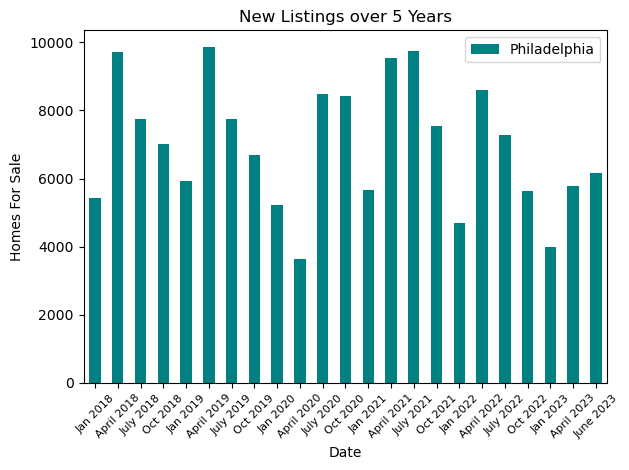

In [16]:
#create visual
complete_df.plot(kind="bar", color="teal")
plt.title("New Listings over 5 Years")
plt.xlabel("Date")
plt.ylabel("Homes For Sale")
plt.xticks(fontsize=8,rotation=45)
plt.tight_layout()
plt.savefig
plt.show()
